# <span style="font-family: 'Times New Roman', serif;"> Redes neuronales </span>

<span style="font-family: 'Times New Roman', serif;">Se importan las librerías necesarias</span>

In [47]:
import pandas as pd
import numpy as np
import h5py
import os
import torch

from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision import transforms

<span style="font-family: 'Times New Roman', serif;">Este código prepara un conjunto de datos de imágenes de frutas para su uso en un modelo de aprendizaje profundo.</span>

<span style="font-family: 'Times New Roman', serif;"> El dataset que se utilizara consiste en imagenes de frutas, las cuales tienen un tamaño de 320x258 pixeles, las fotos de las frutas varian en la luz, sombra, tamaño, la posicion, entre otras, debido que para que sea un modelo robusto, deben haber distintos escenario de reconocimiento. El dataset tiene 5 clases, donde cada una es un tipo diferente de fruta, estas son el banano, la granada, el kiwi, el mango y la pitaya.</span>

<span style="font-family: 'Times New Roman', serif;"> Se tienen dos carpetas, una que es la de entrenamiento, donde cada una de las clases tiene 1500 imagenes y la otra es para las pruebas, donde cada una contiene 500 imagenes.</span>

In [25]:
transform = transforms.Compose([
    transforms.Resize((320, 258)),  # Resize images to 320x258
    transforms.ToTensor(),  # Convert images to tensor format
])

current_dir = os.getcwd()
dataset_path = os.path.join(current_dir, 'dataset', 'Frutas', 'Train')

# Load the dataset
trainset = ImageFolder(root=dataset_path, transform=transform)

# Create a DataLoader to batch the data
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)

# Example of accessing an image and its label
image, label = trainset[0]
print(f'Image shape: {image.shape}, Label: {label}')

#print(trainset.classes)

Image shape: torch.Size([3, 320, 258]), Label: 0


<span style="font-family: 'Times New Roman', serif;">Se usa <small> `transforms.Resize((320,258))` </small> para redimensionar las imagenes a un tamaño de 320x258 pixeles para asegurarse que todas tengan el mismo tamaño, posteriormente se convierten estas imagenes en tensores de PyTorch. </span>

<span style="font-family: 'Times New Roman', serif;">Usando <small>`os.getcwd`</small> accedemos al directorio donde se esta trabajando, posteriormente, con el comando <small>`os.path.join(current_dir, 'dataset', 'Frutas', 'Train')` </small> creamos una ruta al subdirectorio Train, el cual contiene las imagenes que se utilizaran para el entrenamiento del modelo.</span>

<span style="font-family: 'Times New Roman', serif;"> Se utiliza<small> `ImageFolder(root=dataset_path,transform=transform)` </small> para cargar cargar el dataset, ya que esta estructurado en carpetas, se espera que cada subcarpeta en <small>`dataset_path`</small> contenga imagenes que pertenecen a una clase especifica de un tipo de fruta.

<span style="font-family: 'Times New Roman', serif;">El <small>`trainloader`</small> fue creado con un lote de 64 imagenes, con <small>`shuffle=True`</small>, lo cual le dice que mezcle el conjunto de datos cada vez que comenzamos a revisar el dataloader nuevamente. </span>

<span style="font-family: 'Times New Roman', serif;">Posteriormente se accede a la primera imagen en el conjunto de entranamiento, posteriormente se imprime el canal, sus dimensiones y la etiqueta, la cual representa la clase a la que pertenece la imagen.</span>

<span style="font-family: 'Times New Roman', serif;"><small> `Image shape: torch.Size([3, 320, 258]), Label: 0`</small>: Tiene 3 canales, lo cual indica que es RGB, es decir, a color; 320 es el alto; 258 es el ancho y 0 es la clase a la que pertenece, que en este caso es a la clase banano. </span>


In [26]:
# Import necessary packages

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper
import matplotlib.pyplot as plt

<span style="font-family: 'Times New Roman', serif;">Configura el entorno de visualización para facilitar la proyeción de datos.</span>

In [27]:
#Baches de 64 imágenes de 3 canales (RGB) de tamaño 320x258
dataiter = iter(trainloader)
images, labels = next(dataiter)
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 3, 320, 258])
torch.Size([64])


<span style="font-family: 'Times New Roman', serif;">En <small>`dataiter`</small> se crea un iterador a partir del trainloader, lo que permite acceder a los datos de forma secuencial. </span>

<span style="font-family: 'Times New Roman', serif;"> Posteriormente se obtienen los datos del siguiente lote, donde retornan un lote de imagenes y sus respectivas etiquetas</span>

<span style="font-family: 'Times New Roman', serif;"> Se imprime el tipo de variable de las imagenes, el cual es un <small>`torch.Tensor`</small>. Adicionalmente, se imprime la forma del tensor de imagenes <small>`torch.Size([64, 3, 320, 258])`</small> *(lote=64, canales=3, alto=320, ancho=258)* y finalmente se imprime la forma del tensor que contiene las etiquetas <small>`torch.Size([64])`</small>, debido a que cada imagen tiene una etiqueta unica, retorna la cantidad del lote (64)</span>

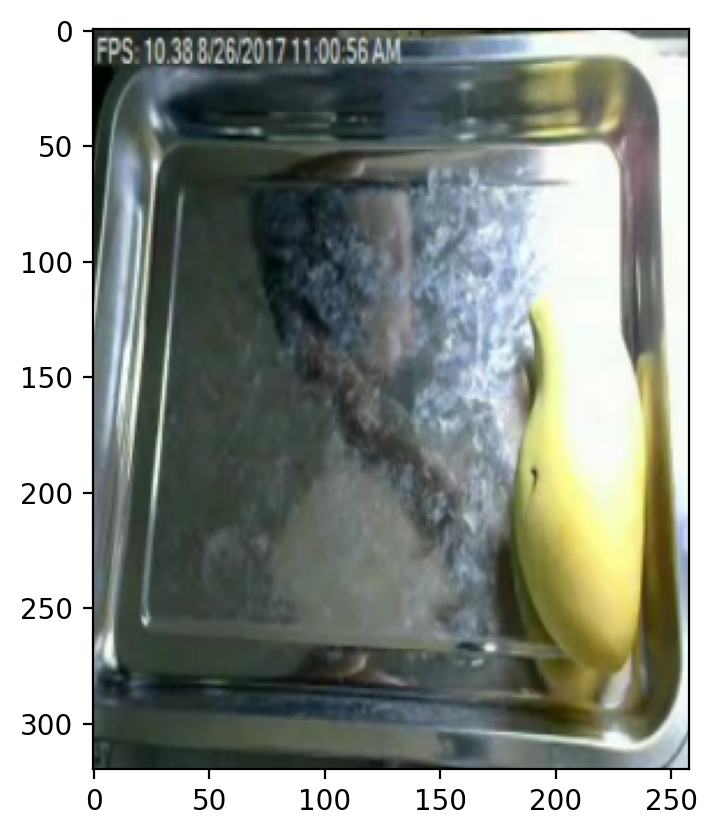

In [28]:
plt.imshow(images[2].numpy().transpose(1, 2, 0))  # Reordenamos los ejes para que sea interpretable por imshow
plt.show()

<span style="font-family: 'Times New Roman', serif;"> Se accede a la tercera imagen del lote, y esta se convierte de un tensor a un array, ya que imshow espera un array de Numpy, posteriormente se reordenan los ejes y se muestra la imagen seleccionada.</span>

In [29]:
#Todas las instancias de 784 se reemplazan por 247680 (3x320x258)
def activation(x):
  return 1/(1+torch.exp(-x))

# Flatten the input images
inputs = images.view(images.shape[0], -1)

# Create parameters
w1 = torch.randn(247680, 256)
b1 = torch.randn(256)

w2 = torch.randn(256, 5)
b2 = torch.randn(5)

h = activation(torch.mm(inputs, w1) + b1)

out = activation(torch.mm(h, w2) + b2)

<span style="font-family: 'Times New Roman', serif;"> Se define la funcion de activacion, la cual es la sigmoide</span>

<span style="font-family: 'Times New Roman', serif;"> Se aplanan las imagenes, y posteriormente se crean los parametros de la red: </span>

<span style="font-family: 'Times New Roman', serif;"><small>`w1:`</small> Primera capa, donde se concectan las entradas *(247680)* con las 256 neuronas en la capa oculta</span>

<span style="font-family: 'Times New Roman', serif;"> <small>`b1:`</small> Bias de la primera capa</span>

<span style="font-family: 'Times New Roman', serif;"><small>`w2:`</small> Segunda capa, donde conecta las 256 neuronas de la capa oculta con la capa de salida, la cual tiene un valor de 5, que es la cantidad de clases.</span>

<span style="font-family: 'Times New Roman', serif;"><small>`b2:`</small> Bias de la segunda capa</span>

<span style="font-family: 'Times New Roman', serif;"><small>`h:`</small> Se realiza un multiplicacion matricial entre las entradas y los pesos de la primera capa, posteriormente se le suma el sesgo y finalmente se pasa el resultado por la funcion de activacion sigmoide</span>

<span style="font-family: 'Times New Roman', serif;"><small>`out:`</small> Se realiza lo mismo que en el anterior paso, pero esta vez las entradas es el valor obtenido en <small>`h`</small>, el resultado retornado es la probabilidad de cada una de las 5 clases para cada una de las 64 imagenes del lote.</span>

In [30]:
def softmax(x):
  return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1, 1)

probabilities = softmax(out)

# Does it have the right shape? Should be (64, 5)
print(probabilities.shape)
# Does it sum to 1?
print(probabilities.sum(dim=1))

torch.Size([64, 5])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


<span style="font-family: 'Times New Roman', serif;">Se define la funcion <small>`softmax`</small>, posteriormente esta es aplicada al tensor <small>`out`</small>, la cual es la salida del modelo definida anteriormente, luego se imprime la forma del tensor, la cual es <small>`torch.Size([64, 5])`</small> donde se espera las probabilidades para 64 imagenes con 5 posibles casos, y finalemente se asegura que la suma para cada columna sume 1.</span>

In [31]:
from torch import nn

<span style="font-family: 'Times New Roman', serif;"> Se importa el modulo <small>`nn`</small></span>

In [32]:
class Network(nn.Module):
  def __init__(self):
    super().__init__()
    
    # Inputs to hidden layer linear transformation
    self.hidden = nn.Linear(247680, 256)
    # Output layer, 5 units
    self.output = nn.Linear(256, 5)
    
    # Define sigmoid activation and softmax output 
    self.sigmoid = nn.Sigmoid()
    self.softmax = nn.Softmax(dim=1)
      
  def forward(self, x):
    # Pass the input tensor through each of our operations
    x = self.hidden(x)
    x = self.sigmoid(x)
    x = self.output(x)
    x = self.softmax(x)
    
    return x

<span style="font-family: 'Times New Roman', serif;">Esta red neuronal tiene una capa oculta de 256 neuronas, usa la función de activación <small>`sigmoide`</small> en la capa oculta, la cual implementa la no linealidad y la función <small>`softmax`</small> en la capa de salida para realizar la clasificación de imagenes en 5 clases.</span>

In [33]:
model = Network()
model

Network(
  (hidden): Linear(in_features=247680, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=5, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

<span style="font-family: 'Times New Roman', serif;"> Se crea una instancia del modelo Network y muestra una representacion de la red neuronal, donde esta presente el nombre de la red *(network)*, la primera capa *(hidden)*, la segunda capa *(output)*, la funcion de activacion usada depues de la capa oculta *(sigmoid)* y la funcion de activacion usada en la capa de salida *(softmax)*.</span>

In [34]:
import torch.nn.functional as F

<span style="font-family: 'Times New Roman', serif;">Se importa una libreria necesaria</span>

In [35]:
class Network(nn.Module):
  def __init__(self):
    super().__init__()
    # Inputs to hidden layer linear transformation
    self.hidden = nn.Linear(247680, 256)
    # Output layer, 5 units
    self.output = nn.Linear(256, 5)
      
  def forward(self, x):
    # Hidden layer with sigmoid activation
    x = F.sigmoid(self.hidden(x))
    # Output layer with softmax activation
    x = F.softmax(self.output(x), dim=1)
    
    return x

<span style="font-family: 'Times New Roman', serif;"><small>`hidden`</small> contiene 247680 entradas conectadas a una capa oculta con 256 neuronas y <small>`output`</small> es la capa de salida que toma 256 salidas de la capa oculta y produce 5 salidas.</span>

<span style="font-family: 'Times New Roman', serif;">Se realiza la funcion para el forward pass donde se le aplica la funcion <small>`sigmoid`</small> a la transformacion lineal de la capa oculta a las entradas.</span>

In [36]:
class Network(nn.Module):
  def __init__(self):
    super().__init__()
    # Defining the layers, 128, 64, 10 units each
    self.fc1 = nn.Linear(247680, 128)
    self.fc2 = nn.Linear(128, 64)
    # Output layer, 10 units - one for each digit
    self.fc3 = nn.Linear(64, 5)
      
  def forward(self, x):
    ''' Forward pass through the network, returns the output logits '''
    
    x = self.fc1(x)
    x = F.relu(x)
    x = self.fc2(x)
    x = F.relu(x)
    x = self.fc3(x)
    x = F.softmax(x, dim=1)
    
    return x

model = Network()
model

Network(
  (fc1): Linear(in_features=247680, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=5, bias=True)
)

<span style="font-family: 'Times New Roman', serif;">La clase Network hereda de torch.nn.Modulo, por lo tanto es una red neuronal personalizada que puede contener capas y realizar un forward pass.</span>

<span style="font-family: 'Times New Roman', serif;"><small>`self.fc1`</small> es una capa totalmente conectada con 247680 entradas y una capa oculta con 128 neuronas, <small>`self.fc2`</small> es la segunda capa totalmente conectada con 128 entradas y una capa oculta de 64 neuronas, finalmente <small>`self.fc3`</small> es la capa de salida con 64 entradas y 5 salidas.</span>

<span style="font-family: 'Times New Roman', serif;">Posteriormente se pasa la entrada por la primera capa, se aplica la funcion de activacion ReLu a esta capa oculta, se repite el mismo proceso con la segunda capa oculta y finalmente, aplicamos la funcion softmax a la capa de salida.</span>

<span style="font-family: 'Times New Roman', serif;">Finalmente se crea una instacia del modelo Network.</span>

In [37]:
print(model.fc1.weight)
print(model.fc1.bias)

Parameter containing:
tensor([[-1.8540e-03, -1.5212e-03,  9.6119e-04,  ..., -1.2380e-03,
          7.3188e-04, -6.1336e-05],
        [ 1.9958e-03, -1.3830e-03,  1.0365e-03,  ...,  8.2931e-04,
          1.1387e-03, -1.4468e-03],
        [-1.7040e-04,  1.2388e-03,  2.4073e-04,  ...,  8.0959e-04,
          1.2479e-03,  1.6824e-03],
        ...,
        [ 1.3261e-03, -4.3876e-04, -4.7936e-05,  ...,  1.1487e-03,
          1.8240e-03,  6.3406e-04],
        [ 1.5491e-03, -2.4823e-04, -1.9828e-03,  ..., -9.9392e-04,
          1.8951e-04, -1.7100e-03],
        [ 3.6461e-04,  7.9319e-04,  1.2879e-03,  ...,  1.7384e-03,
          8.1658e-04,  1.3988e-03]], requires_grad=True)
Parameter containing:
tensor([-6.8615e-04,  8.8626e-04,  4.3703e-05, -1.1294e-03,  1.4088e-03,
         2.0034e-03,  7.7652e-04,  1.6912e-03, -1.3488e-03,  1.3446e-03,
         6.6261e-04, -1.9473e-03,  4.5721e-04, -6.2467e-04, -1.0044e-03,
        -4.2438e-04,  1.2931e-03,  1.5622e-03, -1.8063e-03, -1.4761e-03,
         1.3

<span style="font-family: 'Times New Roman', serif;">Se pueden ver los pesos y sesgos o bias de la primera capa totalmente conectada <small>`fc1`</small> definida previamente.</span>

In [38]:
model.fc1.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

<span style="font-family: 'Times New Roman', serif;">Accede a los sesgos o bias de <small>`fc1`</small> y sobrescribe los valores originales con 0, esto es para garantizar que el modelo comience con una configuracion neutral, de esta manera no hay ninguna preferencia inial en el entrenamiento.</span>

In [39]:
model.fc1.weight.data.normal_(std=0.01)

tensor([[-0.0009, -0.0128,  0.0048,  ...,  0.0100,  0.0066,  0.0056],
        [ 0.0090, -0.0045, -0.0064,  ...,  0.0065,  0.0025,  0.0045],
        [-0.0133, -0.0035,  0.0145,  ..., -0.0096, -0.0004,  0.0055],
        ...,
        [-0.0215, -0.0018, -0.0052,  ..., -0.0019,  0.0141,  0.0193],
        [-0.0062, -0.0061,  0.0099,  ..., -0.0191, -0.0116,  0.0002],
        [ 0.0085, -0.0057,  0.0003,  ...,  0.0026,  0.0195,  0.0043]])

<span style="font-family: 'Times New Roman', serif;">Accede a los pesos de <small>`fc1`</small> e inicializa los pesos siguiendo una distribucion normal con media 0 y desviacion estandar de 0.01, esto garantiza que los valores de los pesos comiencen cercanos a cero, lo que ayuda a estabilizar el proceso de entrenamiento de las primera iteraciones</span>

In [40]:
def view_classify(img, ps):
  ps = ps.data.numpy().squeeze()
  fig, (ax1, ax2) = plt.subplots(figsize=(10,13), ncols=2)
  ax1.imshow(img.numpy().transpose((1, 2, 0)))
  ax1.axis('off')
  ax2.barh(np.arange(5), ps)
  ax2.set_aspect(0.1)
  ax2.set_yticks(np.arange(5))
  ax2.set_yticklabels(['Banano', 'Granada', 'Kiwi', 'Mango', 'Pitaya'], size='medium');
  ax2.set_title('Class Probability')
  ax2.set_xlim(0, 1.1)

  plt.tight_layout()

<span style="font-family: 'Times New Roman', serif;">Se define la funcion <small>`view_classify`</small> donde *img* es la imagen de entrada que sera clasificada y *ps* es la probabilidad de pertenencia a cada clase.</span>

<span style="font-family: 'Times New Roman', serif;"><small>`ps:`</small> Se toma el tensor de probabilidades ps y se convierte en un array de Numpy, la funcion squeeze() ayuda a que se resulte en un array unidimensional con las probabilidades para cada clase</span>

<span style="font-family: 'Times New Roman', serif;">Se crea una figura con dos subgraficos, en el primero <small>`ax1`</small> se podra visualizar la imagen y el segundo <small>`ax2`</small> mostrara un grafico de barras horizontal con las probabilidades de las clases.</span>

<span style="font-family: 'Times New Roman', serif;">Se usa <small>`imshow`</small> para mostrar la imagen del primer grafico y posteriormente se eliminan los ejes para que solo se vea la imagen.</span>

<span style="font-family: 'Times New Roman', serif;">Se dibuja un grafico de barras horizontales con las probabilidaes para cada una de las 5 clases y se crea un array con los numeros de 0-4 para representar las clases</span>

<span style="font-family: 'Times New Roman', serif;">Posteriormente se ajusta la proporcion vertical del grafico, se le asignan los numeros de 0-4 a las clases correspondientes usando <small>`set_yticks`</small> y <small>`set_yticklabels`</small> *(0=Banano, 1=Granada, 2=Kiwi, 3=Mango y 4=Pitaya)*. Finalmente se le agrega un titulo al segundo grafico y se fija el limite del eje x de 0 a 1.1.</span>

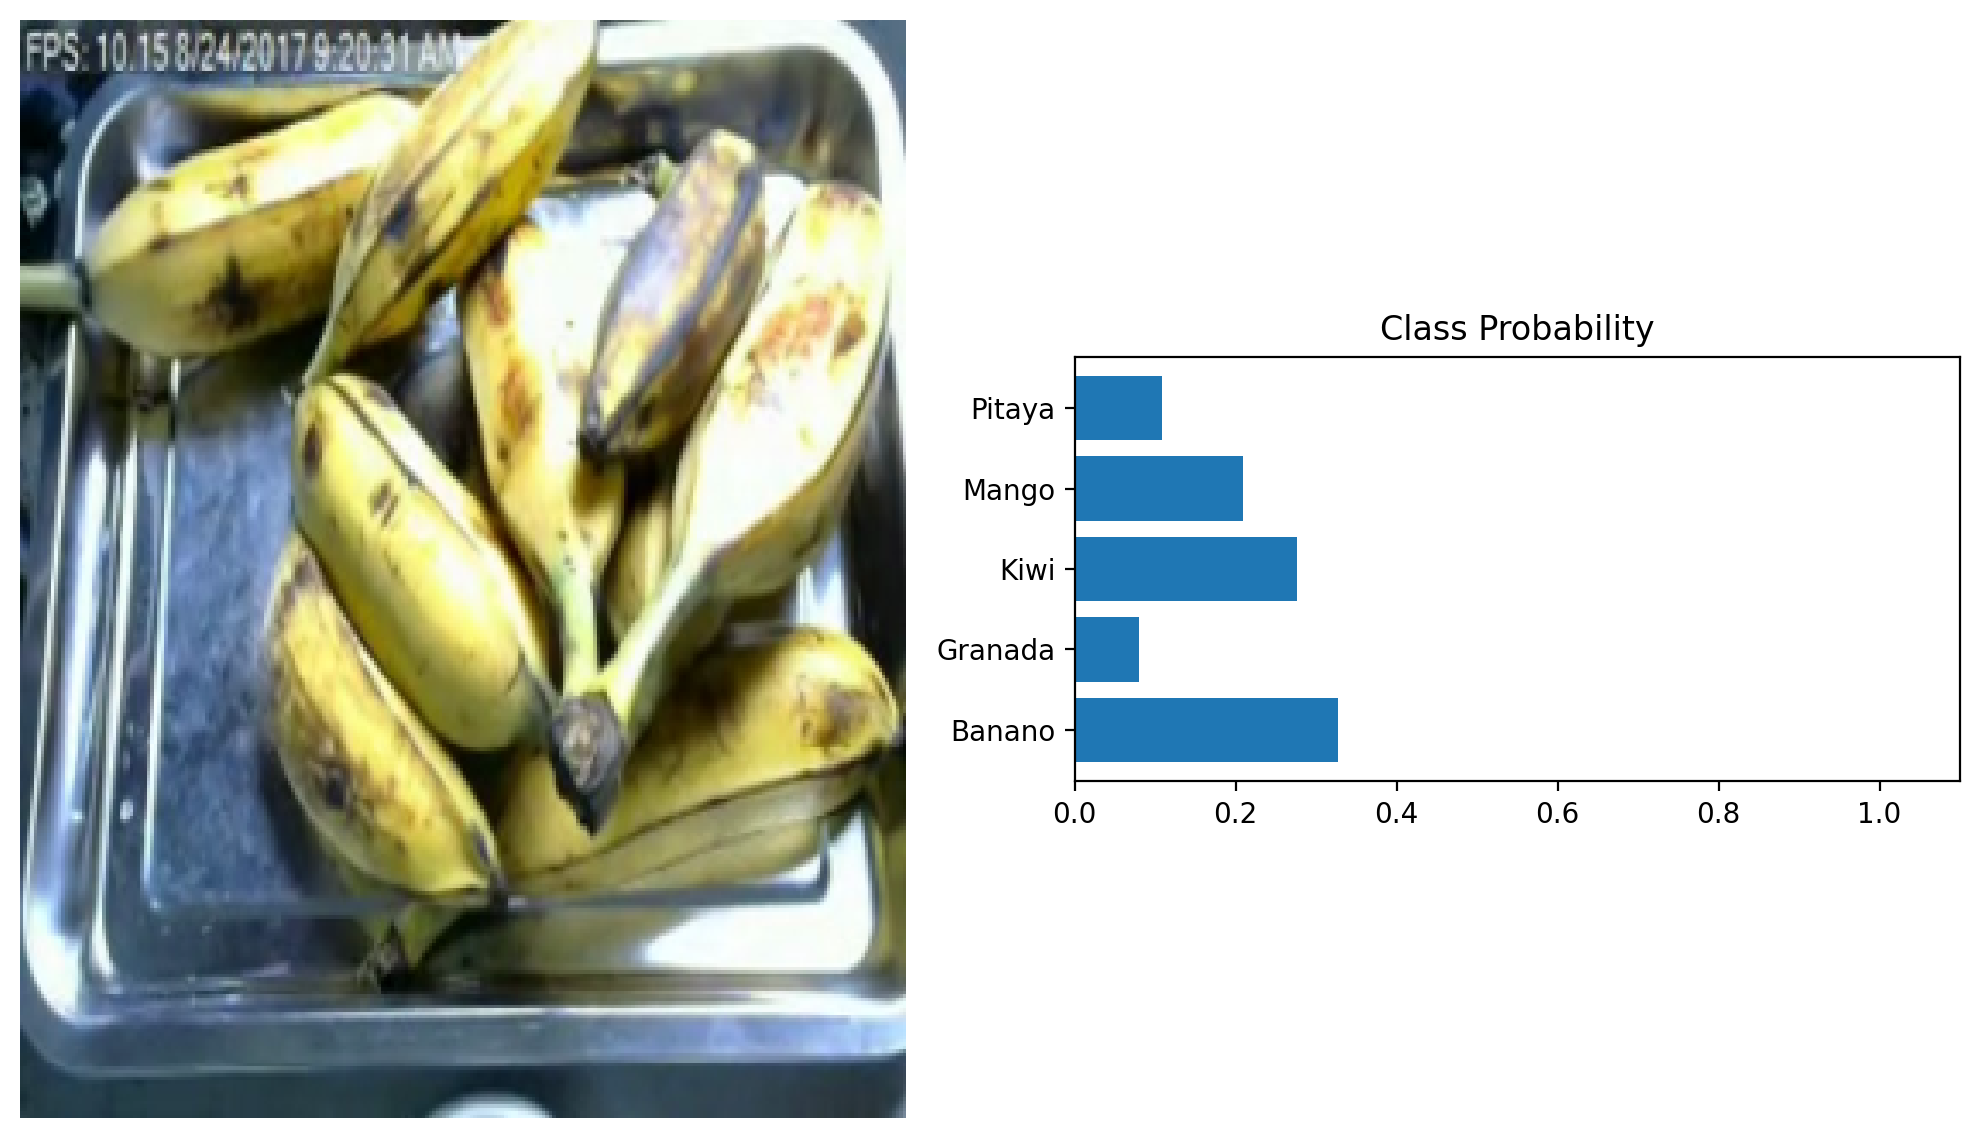

In [41]:
# Grab some data 
dataiter = iter(trainloader)  # Asegúrate de usar el `train_loader` correcto para tu dataset
labels = next(dataiter)
images = images.view(images.shape[0], -1)

# No es necesario redimensionar las imágenes, ya que se mantienen en su formato original
# (batch_size, color_channels, height, width) ya es (batch_size, 3, 320, 258)
# Forward pass a través de la red
img_idx = 0  # Puedes cambiar el índice para ver otras imágenes
ps = model.forward(images[img_idx,:].unsqueeze(0))  # Asegúrate de agregar un batch dimension con unsqueeze(0)

# Obtener la imagen y mostrarla con las probabilidades
img = images[img_idx]
view_classify(img.view(3, 320, 258), ps)

<span style="font-family: 'Times New Roman', serif;">Se obtienen datos del DataLoader, tomando el primer lote de imagenes y etiquetas, posteriormente se aplanan las imagenes, luego se pasa la imagen a traves del modelo, obteniendo las probabilidades <small>`ps`</small> para cada clase. Finalmente se recupera la imagen seleccionada <small>`img`</small>, la cual se le pasa a la funcion <small>`view_classify`</small> en su formato original de tres dimensiones, junto con las probabilades de clasificacion <small>`ps`</small>. </span>

Sequential(
  (0): Linear(in_features=247680, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=5, bias=True)
  (5): Softmax(dim=1)
)


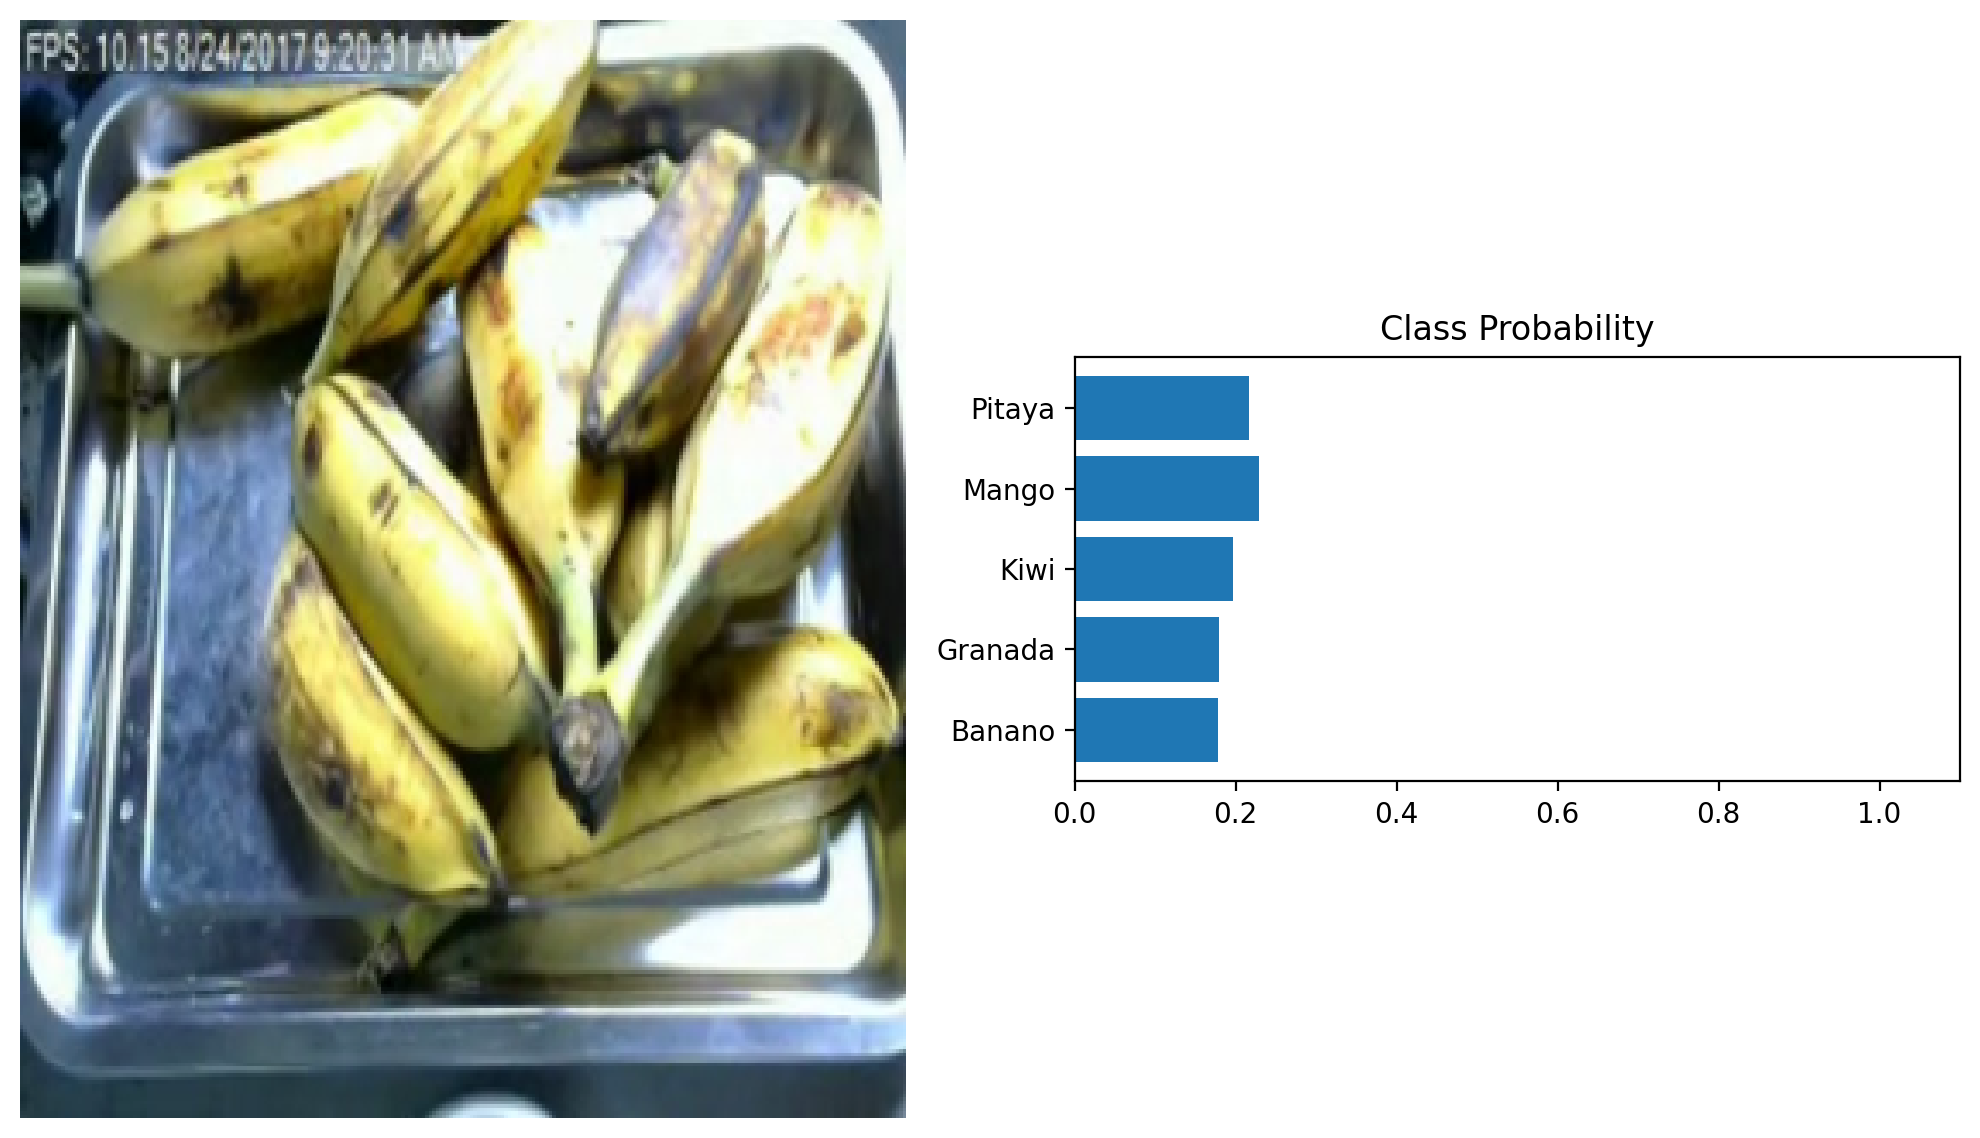

In [46]:
# Hyperparameters for our network
input_size = 247680
hidden_sizes = [128, 64]
output_size = 5

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))
print(model)

# Forward pass through the network and display output
labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)
#images.resize_(images.shape[0], 3, 247680)
ps = model.forward(images[0,:].unsqueeze(0))
view_classify(images[0].view(3, 320, 258), ps)

<span style="font-family: 'Times New Roman', serif;">En esta parte se define una red neuronal feed-forward simple, la cual realiza la prediccion sobre una imagen, mostrando la salida de la clasificacion.</span>

<span style="font-family: 'Times New Roman', serif;">Se definen los hiperparametros de la red, donde <small>`input_size`</small> es el tamaño de la entrada que corresponde al numero total de pixeles de una imagen, <small>`hidden_sizes`</small> son dos capas ocultas, la primera con 128 unidades y la segunda con 64,<small>`output_size`</small> es el tamaño de la salida, donde cada una representa una clase de frutas.</span>

<span style="font-family: 'Times New Roman', serif;">Se define la red feed-forward, luego se crea una secuencia de capas para una red feed-forward, donde se crea la capa totalmente conectada que transforma la entrada a la primera capa oculta de 128, posteriormente se pasa por la funcion <small>`ReLu`</small>, el resultado de esto es transformado a la segunda capa oculta de 64 unidades, esto se pasa por la funcion de activacion <small>`ReLu`</small> nuevamente, el resultado de esto es transformado a la capa de salida de 5 unidades, y finalmente esto se pasa por la funcion de activacion <small>`Softmax`</small>.

<span style="font-family: 'Times New Roman', serif;">Se visualiza la arquitectura de la red, mostrando las capas definidas.</span>

<span style="font-family: 'Times New Roman', serif;">Luego se pasan las imagenes a traves de la red, se aplanan y se selecciona la primera imagen del lote para obtener las probabilidades de clasificacion de esta, y finalmente se visualiza la imagen y las probabilidades.</span>

In [43]:
print(model[0])
model[0].weight

Linear(in_features=247680, out_features=128, bias=True)


Parameter containing:
tensor([[-0.0010, -0.0001,  0.0006,  ..., -0.0012,  0.0013, -0.0010],
        [ 0.0014, -0.0006, -0.0005,  ...,  0.0012, -0.0019,  0.0016],
        [ 0.0004, -0.0019,  0.0009,  ..., -0.0001,  0.0001, -0.0012],
        ...,
        [-0.0008,  0.0008,  0.0006,  ..., -0.0008, -0.0009, -0.0009],
        [ 0.0009,  0.0007, -0.0005,  ..., -0.0008, -0.0014,  0.0016],
        [-0.0008,  0.0007,  0.0012,  ...,  0.0015, -0.0006, -0.0010]],
       requires_grad=True)

<span style="font-family: 'Times New Roman', serif;">Se accede a la primera capa del modelo secuencial, que en este caso es una capa totalmente conectada, con 247680 entradas y 128 salidas, posteriormente se obtienen los pesos de esta.</span>

In [44]:
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('output', nn.Linear(hidden_sizes[1], output_size)),
                      ('softmax', nn.Softmax(dim=1))]))
model

Sequential(
  (fc1): Linear(in_features=247680, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=64, out_features=5, bias=True)
  (softmax): Softmax(dim=1)
)

<span style="font-family: 'Times New Roman', serif;">Se crea una red neuronal secuencial en la que cada capa tiene un nombre explicito en lugar de referirse a las capas solo por su indice, como se hacia anteriormente, esto se logra al crear un diccionario usando <small>`OrderedDict`</small>.

In [45]:
print(model[0])
print(model.fc1)

Linear(in_features=247680, out_features=128, bias=True)
Linear(in_features=247680, out_features=128, bias=True)


<span style="font-family: 'Times New Roman', serif;">Podemos observar que usando <small>`OrderedDict`</small> ya no se debe de acceder a las capas usando indices (model[0]), sino que ahora podemos acceder a ellas usando el nombre asignado (model.fc1).</span>